In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import warnings
import matplotlib.pyplot as plt
import gcsfs
import intake
import xesmf as xe
%matplotlib inline

# Load CanESM5 tas/tos from Pangeo cloud datastore

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

In [10]:
# Load CanESM5
query = dict(experiment_id=['historical'], source_id=['CanESM5'], table_id=['Amon', 'Omon'], 
             variable_id=['tas','tos'], grid_label=['gn'], member_id=['r1i1p2f1'])
cat = col.search(**query)

dset_dict = cat.to_dataset_dict()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [13]:
tos = dset_dict['CMIP.CCCma.CanESM5.historical.Omon.gn']
tas = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']

# Regridding tos to tas grid with periodic=False (default)

Note the vertical line of NaNs near 75E - aligning with the north fold

In [16]:
regridder1 = xe.Regridder(tos, tas, "bilinear")
tos_regrid1 = regridder1(tos)

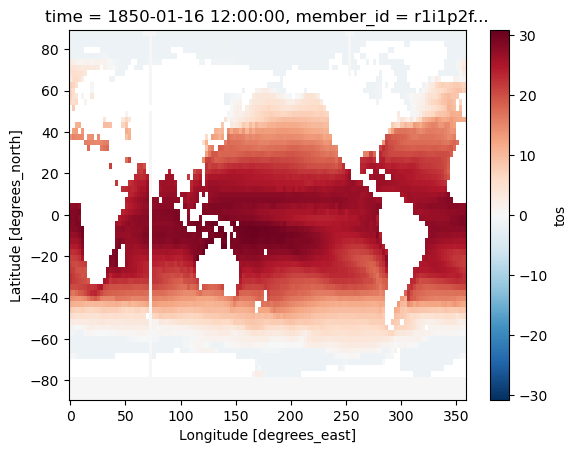

In [19]:
tos_regrid1.isel(time=0).tos.plot()

# Set period=True in regridder

Note the vertical line no longer covers the full latitude range.

In [20]:
regridder2 = xe.Regridder(tos, tas, "bilinear", periodic=True)
tos_regrid2 = regridder2(tos)

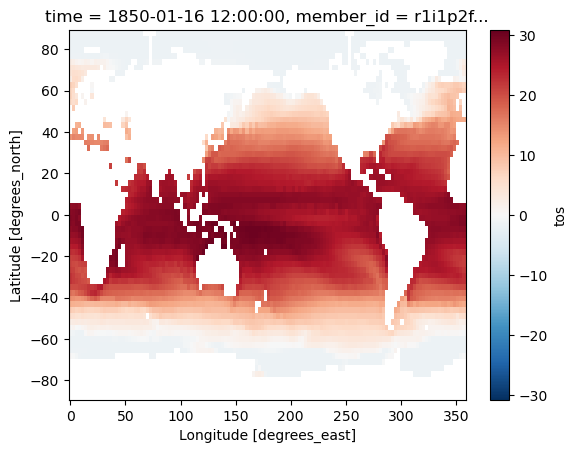

In [21]:
tos_regrid2.isel(time=0).tos.plot()

# Set periodic=True with interpolation

In [30]:
regridder3 = xe.Regridder(tos, tas, "bilinear", periodic=True, extrap_method="nearest_s2d")
tos_regrid3 = regridder3(tos)

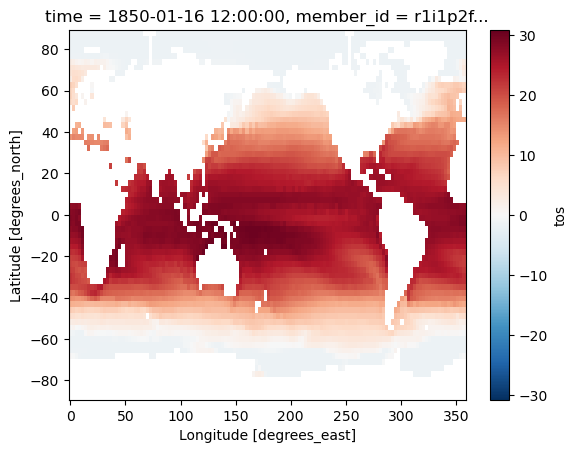

In [31]:
tos_regrid3.isel(time=0).tos.plot()